## BUSINESS PROBLEM

*PROJECT 2: FRAUDULENT CREDIT CARDS TRANSACTIONS*

Context

A bank is interested in providing higher quality customer service to protect customers financial assets. The bank has been receiving several complaints about credit card frauds from their customers and the news media is regularly reporting about how the bank's customers are losing large amounts of money and the bank is doing nothing to stop it. This is impacting both the customers experience and their market share. The Senior Management is asking for a deep dive
into this issue.

You just got hired as the Business Analyst for the bank, and they provided you with 6 months of available data (step 0 to 179 refer to the dates). They want you to share some insights using the features in the file to determine if you can see a pattern for the fraudulent transactions. They are expecting you to provide some suggestions on how to tackle the problem.

Questions
1. Show a summary of the variable you are studying (target variable). Plot the most appropriate graph to represent this data
2. Calculate summary statistics from the data
3. Calculation of daily trends of transactions for different categories of variables
4. What are your thoughts on the fraudulent transactions? Is there a threshold of the spent? Is there a specific ‘gender’ with a higher probability to be the victim of a fraudulent act? or ‘category’ of transactions with higher chance to be fraudulent?
5. What are your recommendations to the bank's management and describe how your solution will help regain trust from customers?
6. Any other data that you would ask the team to provide? Why?

#  Importing Librairies

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re as re
import seaborn as sns
import datetime as dt
import io

# Retrieve & Clean Data

In [ ]:
url="https://raw.githubusercontent.com/Ldave01/BA-Group-Project/main/file1.csv"
data=pd.read_csv(url)
data.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [ ]:
#Printing a summary of the DataFrame 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [ ]:
#This line indicates the number of rows and columns in the database.
data.shape

(594643, 10)

In [ ]:
#Function to check for null values in the database
def check_null(dataset):
    null=data.isna().sum()/dataset.shape[0]
    return null[null > 0.0]

In [ ]:
#Calling the function to print the null values
check_null(data)

Series([], dtype: float64)

In [ ]:
# selected wanted columns
cols = ['step','customer','age','gender','merchant','category','amount','fraud']
data = data.loc[:,cols]

In [ ]:
#Function to remove unwanted characters from column value
def remove_char(dataset,cols=[],new={}):
  dataset[cols] = dataset[cols].replace(new, regex=True)
  return dataset.head()

In [ ]:
remove_char(data,cols=['customer','age','gender','merchant','category'],new={"'":'', "es_":''})

In [ ]:
#check for duplicated value in the dataset
data.duplicated().sum()

In [ ]:
#Function that shows the number of unique values in dataset columns
def dataset_cardinalite(dataset,is_number=True):
  my_dict = dict()
  for col in dataset.columns:
    if is_number:
      my_dict[col] = dataset[col].nunique()
    else:
       my_dict[col] = dataset[col].unique()
  return my_dict

In [ ]:
dataset_cardinalite(data)

In [ ]:
#check unique values from gender column
data.gender.unique()

In [ ]:
# Rename gender unique values 
data['gender']=data['gender'].replace(['M','F','E','U'],['Male','Female','Enterprise','Gender_Unknown'])

In [ ]:
data.category.unique()

array(['transportation', 'health', 'otherservices', 'food',
       'hotelservices', 'barsandrestaurants', 'tech', 'sportsandtoys',
       'wellnessandbeauty', 'hyper', 'fashion', 'home', 'contents',
       'travel', 'leisure'], dtype=object)

In [ ]:
data['category']=data['category'].replace(['contents','home','food','health', 'hotelservices','otherservices','hyper','sportsandtoys','leisure','travel','tech','fashion','barsandrestaurants'],
                                          ['restauration','domestic','domestic','domestic', 'restauration','restauration','wellnessandbeauty','wellnessandbeauty','wellnessandbeauty','wellnessandbeauty','wellnessandbeauty','wellnessandbeauty','restauration'])

In [ ]:
data.category.unique()

array(['transportation', 'domestic', 'restauration', 'wellnessandbeauty'],
      dtype=object)

In [ ]:
#Summary of the variable gender
data.gender.value_counts(normalize=True)

Female            0.545815
Male              0.451338
Enterprise        0.001981
Gender_Unknown    0.000866
Name: gender, dtype: float64

In [ ]:
#Summary of the variable category
data.category.value_counts(normalize=True)

transportation       0.849449
domestic             0.074621
wellnessandbeauty    0.059257
restauration         0.016672
Name: category, dtype: float64

In [ ]:
#Summary of the variable age
data.age.value_counts(normalize=True)

2    0.314996
3    0.247427
4    0.183345
5    0.105344
1    0.097758
6    0.045025
0    0.004123
U    0.001981
Name: age, dtype: float64

In [ ]:
data.describe()

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


In [ ]:
data.head(2)

,step,customer,age,gender,merchant,category,amount,fraud
0,0,C1093826151,4,Male,M348934600,transportation,4.55,0
1,0,C352968107,2,Male,M348934600,transportation,39.68,0


In [ ]:
data["age"]=data["age"].map({"0":"<=18 year","1":"19-25 year","2":"26-35 year","3":"36-45 year","4":"46-55 year","5":"56-65 year","6":">65 year","U":"unknown"})

# Data Processing

List Of Categorical Variables -> Gender, Category, Fraud Merchant

List Of Numerical variables -> Amount, Age

## Univariate Analysis 

In [ ]:
def generate_barchart(data=None, title ="",abs_value ="Total",rel_value="Percent",figsize =(10,6),percent=0.35):
  plt.figure(figsize=figsize)
  axes = sns.barplot(data=data,x=data.index,y=abs_value)
  i=0
  color ="white"
  for tot, perc in zip(data[abs_value],data[rel_value]):
    if tot/2 <30:
      tot = 30
      color="red"
    
    axes.text(i,
              tot/2,
              str(np.round(perc*100,2))+ "%",
               fontdict=dict(color=color,fontsize=12,horizontalalignment="center")
              )
    axes.text(i,
              tot+ 3,
              str(tot),
               fontdict=dict(color="blue",fontsize=12,horizontalalignment="center")
              )
    
    i+=1
  plt.title(title)
  change_width(axes,percent)
  plt.show()

In [ ]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

In [ ]:
# kakile frekans absoli ak frekans relativ yon varyab kategorik
def prob_category(data,col="Pclass_letter", abs_value ="Total",rel_value ="Percent",show_plot=False, title="",horizontal=False,percent = 0.35):
  # absolute value
   res1 = data[col].value_counts().to_frame()
   res1.columns = [abs_value]

   res2 = data[col].value_counts(normalize=True).to_frame()
   res2.columns = [rel_value]
   if  not show_plot:
     return pd.concat([res1,res2],axis=1)
   else:
     result = pd.concat([res1,res2],axis=1)
     if len(result.index) >=3:
       percent =0.8
     generate_barchart(data=result, title =title,abs_value =abs_value,rel_value=rel_value,figsize =(10,6),percent = percent)
     return result

### 1-. A summary of the target variable and the appropriate graph to represent it

The target variable is Fraude

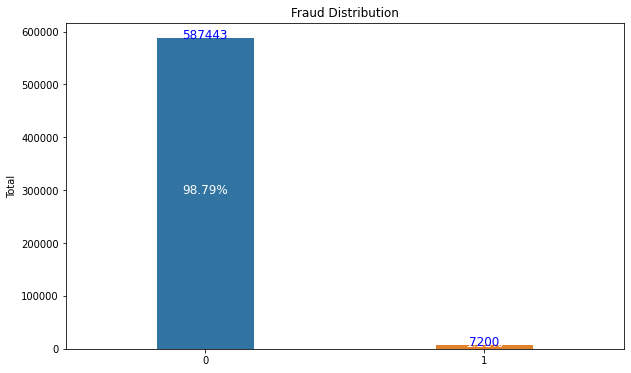

,Total,Percent
0,587443,0.987892
1,7200,0.012108


In [ ]:
prob_category(data, col='fraud', show_plot=True, title='Fraud Distribution', percent=0.35)

In [ ]:
pie=data.fraud.value_counts().to_frame()
pie

,fraud
0,587443
1,7200


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


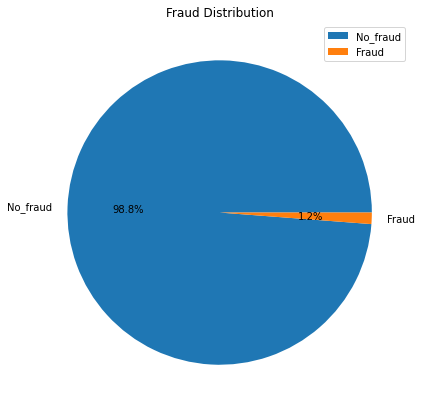

In [ ]:
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(pie, labels = ['No_fraud','Fraud'],autopct='%1.1f%%')
plt.title('Fraud Distribution')  
# show plot
plt.legend()
plt.show()

We can see that the fraudulent transaction represent a really small part**(1.21%)** of the overall transaction that did go through the bank.


### 2-. Statistics Summary From The Data


### Data Analysis Univariate for Categorical Variable

Categorical variables -> Gender, Category, Fraud, Age

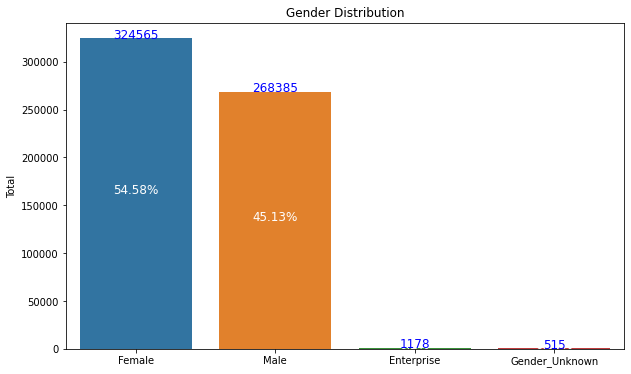

,Total,Percent
Female,324565,0.545815
Male,268385,0.451338
Enterprise,1178,0.001981
Gender_Unknown,515,0.000866


In [ ]:
prob_category(data, col='gender', show_plot=True, title='Gender Distribution')

For the categorical variable gender ,there were 54.58% of the transaction that were made by female, 45.13% of of the transaction that were made by male, 0.1% of the transaction that were made by entreprise and 0.0866 % of the transaction were from no specific gender origin.

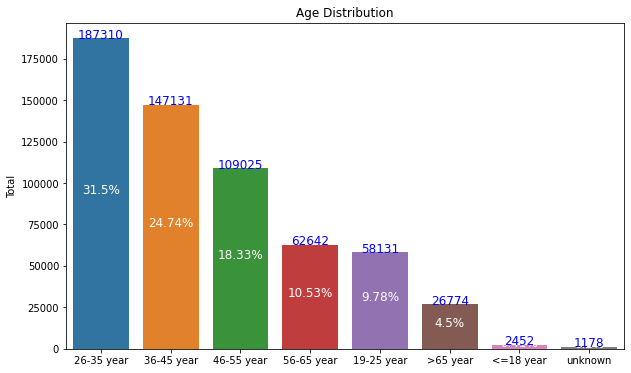

,Total,Percent
26-35 year,187310,0.314996
36-45 year,147131,0.247427
46-55 year,109025,0.183345
56-65 year,62642,0.105344
19-25 year,58131,0.097758
>65 year,26774,0.045025
<=18 year,2452,0.004123
unknown,1178,0.001981


In [ ]:
 prob_category(data, col='age', show_plot=True, title='Age Distribution')

for the categorical variable age distribution, the client that had a account for 2 year represented 31.5%, those that had one for 3 year represented 24.74%, those that had one for 4 years 18.33%, those that had one for 5 years 10.53%, for one year 9.78% for 6years 4.5% and those that had one for less than a year 0.4123% 

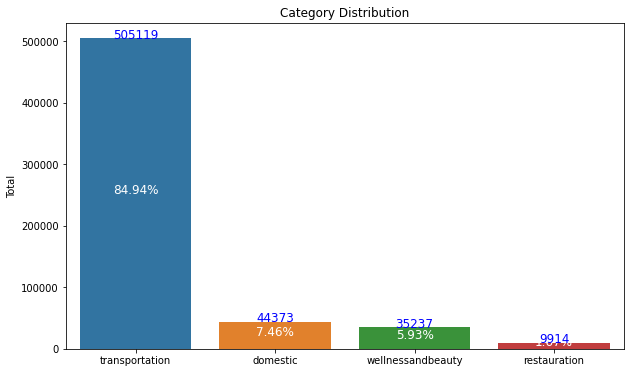

,Total,Percent
transportation,505119,0.849449
domestic,44373,0.074621
wellnessandbeauty,35237,0.059257
restauration,9914,0.016672


In [ ]:
prob_category(data, col='category', show_plot=True, title='Category Distribution',horizontal=True)

for the categorical variable transaction category, transportation transaction accounted for 84.94%  the total sum of transactions completed , domestic transaction accounted for 7.46%, wellnessandbeauty for 5.93% and restauration for 1.66%.

### Data Analysis Quantitative Univariate

Quantative variables -> Amount

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


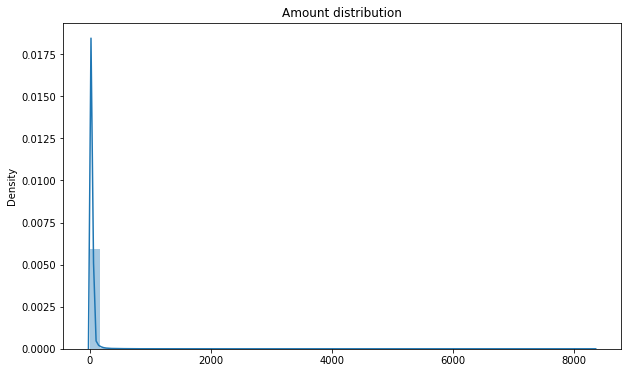

In [ ]:
# Histogram with rugplot and kde 
fig=plt.figure(figsize=(10,6))
sns.distplot(x=data['amount'], kde=True)
plt.title("Amount distribution")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


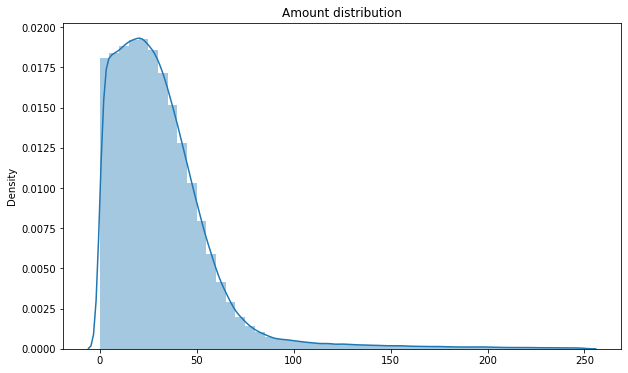

In [ ]:
fig=plt.figure(figsize=(10,6))
sns.distplot(x=data['amount'][data["amount"]<250], kde=True)
plt.title("Amount distribution")
plt.show()

the greatest number of transaction were made for a amount of less than 100 $

Text(0.5, 1.0, 'Age Boxplot Distribution')

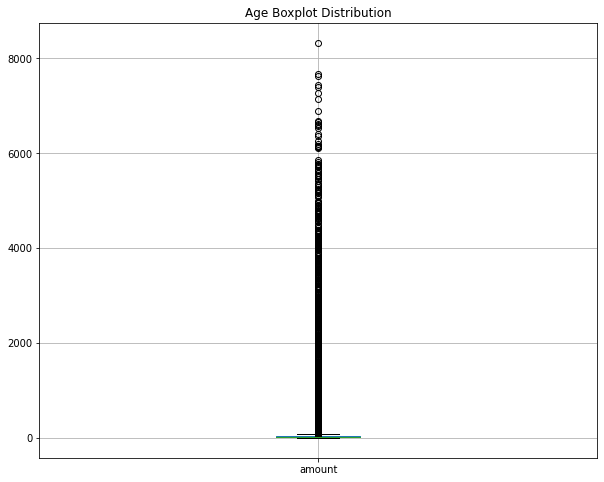

In [ ]:
# Age Univariate Analysis
data.boxplot(column="amount",figsize=(10,8))
plt.title("Age Boxplot Distribution")


Text(0.5, 1.0, 'AMount Boxplot Distribution')

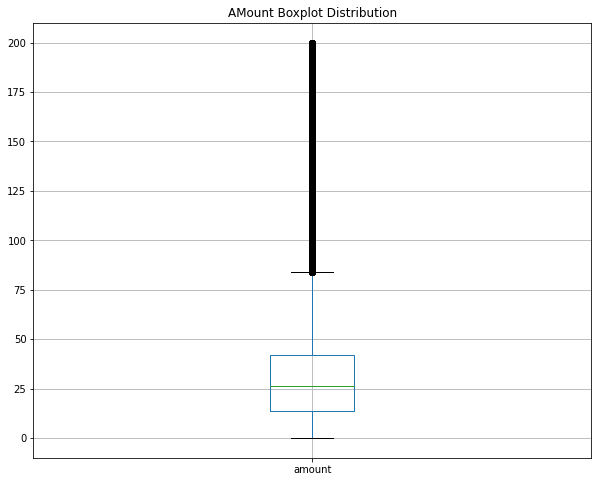

In [ ]:
# Age Univariate Analysis
data[data["amount"]<200].boxplot(column="amount",figsize=(10,8))
plt.title("AMount Boxplot Distribution")


In [ ]:
data.amount.describe()

count    594643.000000
mean         37.890135
std         111.402831
min           0.000000
25%          13.740000
50%          26.900000
75%          42.540000
max        8329.960000
Name: amount, dtype: float64

## Data Analysis Bivariate

#### Fraud vs Category

#### Fraud vs Genre

#### Fraud vs Age


In [ ]:
data['index']=data.index
fraud_category = pd.pivot_table(data=data,index="category",columns="fraud",values ="amount",aggfunc="sum",fill_value=0)
fraud_category=fraud_category.sort_values(1, ascending=False)
fraud_category

fraud,0,1
category,,
wellnessandbeauty,1.953666e+06,2671180.22
domestic,2.661763e+06,828485.57
restauration,4.759115e+05,323005.38
transportation,1.361709e+07,0.00


"for p in ax.patches:\n    width = p.get_width()\n    height = p.get_height()\n    x, y = p.get_xy() \n    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')"

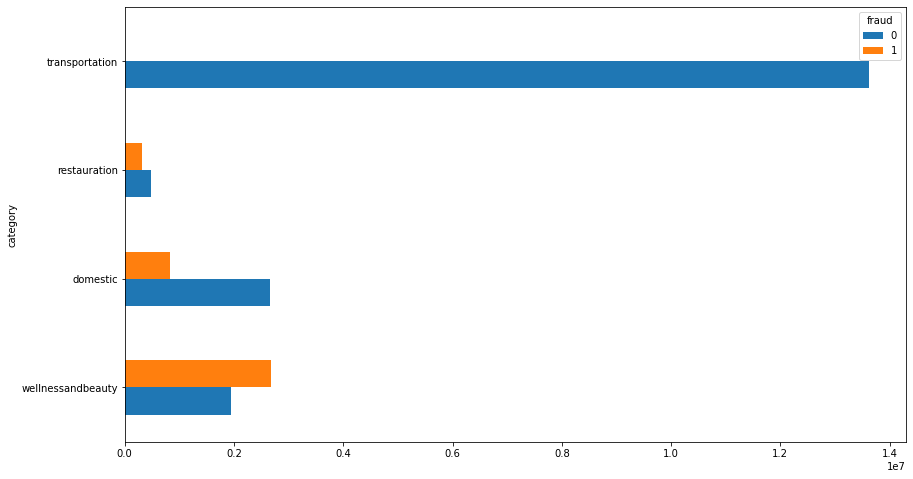

In [ ]:
ax=fraud_category.plot(kind='barh', width=0.5)
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(14, 8)

In [ ]:
fraud_gender = pd.pivot_table(data=data,index="gender",columns="fraud",values ="amount",aggfunc='sum',fill_value=0)
fraud_gender=fraud_gender.sort_values(1, ascending=False)
fraud_gender

fraud,0,1
gender,,
Female,10223625.68,2503555.82
Male,8428746.65,1315801.14
Enterprise,39833.13,3314.21
Gender_Unknown,16227.10,0.00


In [ ]:
a=fraud_gender.iat[0,0]-fraud_gender.iat[1,0]
b=fraud_gender.iat[0,1]-fraud_gender.iat[1,1]
print(a,b)
print(fraud_gender.iat[0,1])
print(fraud_gender.iat[1,1])

1794879.0300000347 1187754.6799999971
2503555.8199999975
1315801.1400000004


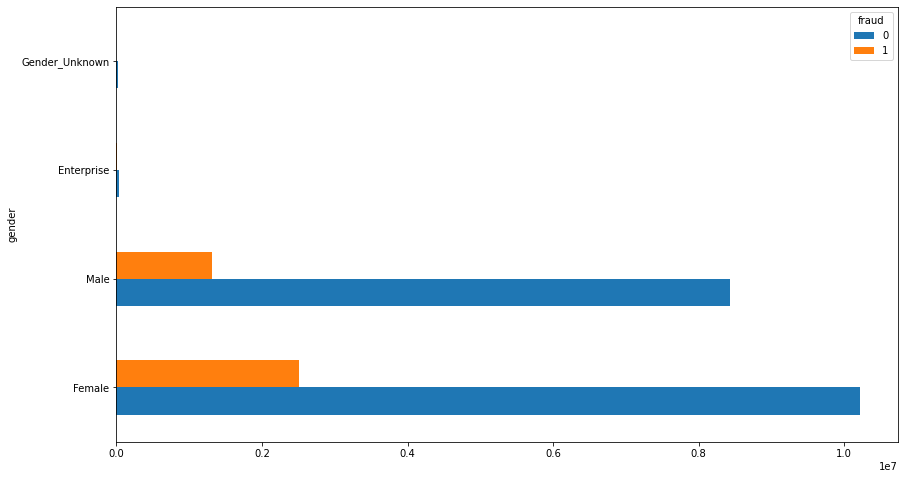

In [ ]:
graph=fraud_gender.plot(kind='barh', width=0.5)
fig = graph.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(14, 8)

In [ ]:
fraud_age = pd.pivot_table(data=data,index="age",columns="fraud",values ="index",aggfunc="count",fill_value=0,margins=1)
fraud_age=fraud_age.sort_values(1, ascending=False)
fraud_age

fraud,0,1,All
age,,,
All,587443,7200,594643
26-35 year,184966,2344,187310
36-45 year,145376,1755,147131
46-55 year,107615,1410,109025
19-25 year,57442,689,58131
56-65 year,61956,686,62642
>65 year,26513,261,26774
<=18 year,2404,48,2452
unknown,1171,7,1178


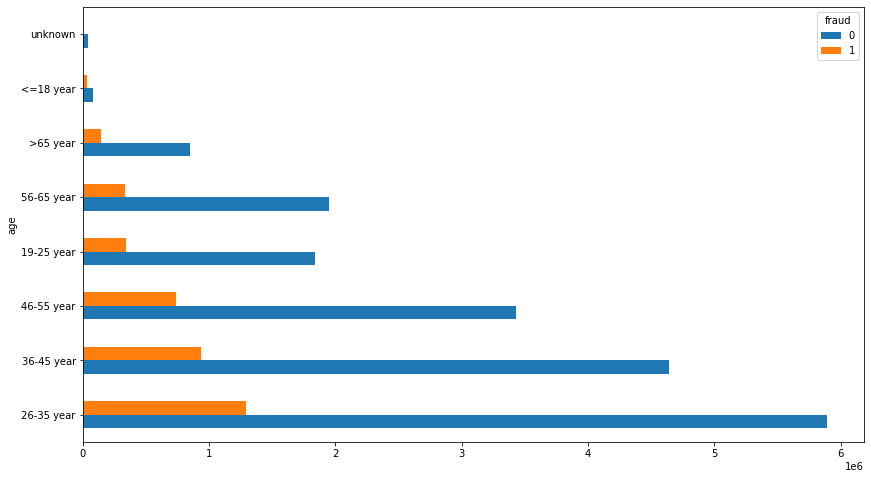

In [ ]:
graph=fraud_age.plot(kind='barh', width=0.5)
fig = graph.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(14, 8)

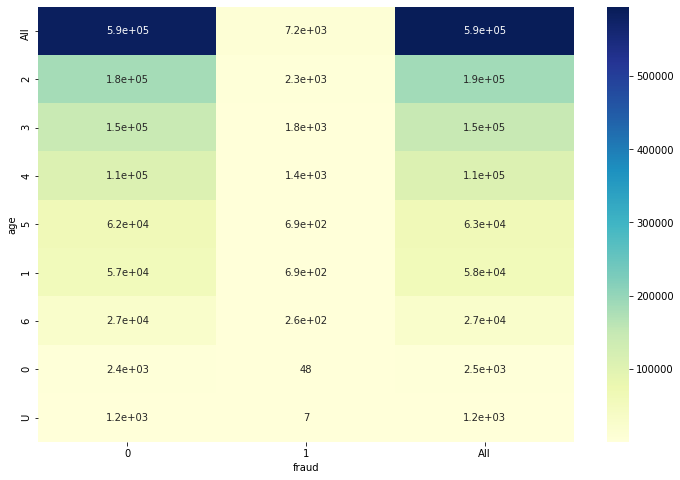

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(fraud_amount, annot=True, cmap="YlGnBu")

In [ ]:
from scipy.stats import chi2_contingency


In [ ]:
fraud_amount.T.values

array([[587443, 184966, 145376, 107615,  61956,  57442,  26513,   2404,
          1171],
       [  7200,   2344,   1755,   1410,    686,    689,    261,     48,
             7],
       [594643, 187310, 147131, 109025,  62642,  58131,  26774,   2452,
          1178]])

Null Hypothesis H0: 
fraud and gender are independent

Alternative Hypothesis H1 : 
fraud and gender are not independent;

In [ ]:
# Apply Test
stat, p, dof, expected = chi2_contingency(fraud_gender.T.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

p-values: 0.0
Hypothesis Rejected


We rejected the null Hypothesis

That to say, gender and fraud are not independent

In [ ]:
fraud_cat = pd.pivot_table(data=data,index="category",columns="fraud",values ="index",aggfunc="count",fill_value=0)
fraud_cat=fraud_cat.sort_values(0, ascending=False)
fraud_cat.T.values

array([[505119,  42375,  30931,   9018],
       [     0,   1998,   4306,    896]])

In [ ]:
# Apply Test
stat, p, dof, expected = chi2_contingency(fraud_cat.T.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

p-values: 0.0
Hypothesis Rejected


We rejected the null Hypothesis

That to say, category and fraud are not independent

In [ ]:
fraud_amount = pd.pivot_table(data=data,index="amount",columns="fraud",values ="index",aggfunc="count",fill_value=0)
fraud_amount=fraud_amount.sort_values(0, ascending=False)
fraud_amount.T.values

array([[146, 146, 144, ...,   0,   0,   0],
       [  0,   0,   1, ...,   1,   1,   1]])

In [ ]:
# Apply Test
stat, p, dof, expected = chi2_contingency(fraud_amount.T.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

p-values: 0.0
Hypothesis Rejected


We rejected the null Hypothesis

That to say, amount and fraud are not independent

In [ ]:
fraud_age = pd.pivot_table(data=data,index="age",columns="fraud",values ="index",aggfunc="count",fill_value=0)
fraud_age=fraud_age.sort_values(0, ascending=False)
fraud_age

fraud,0,1
age,,
26-35 year,184966,2344
36-45 year,145376,1755
46-55 year,107615,1410
56-65 year,61956,686
19-25 year,57442,689
>65 year,26513,261
<=18 year,2404,48
unknown,1171,7


In [ ]:
# Apply Test
stat, p, dof, expected = chi2_contingency(fraud_amount.T.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

p-values: 0.0
Hypothesis Rejected


In [ ]:
cordata = data.corr(method="pearson")
cordata

,step,amount,fraud,index
step,1.000000,-0.007961,-0.011898,0.998973
amount,-0.007961,1.000000,0.489967,-0.007817
fraud,-0.011898,0.489967,1.000000,-0.011703
index,0.998973,-0.007817,-0.011703,1.000000


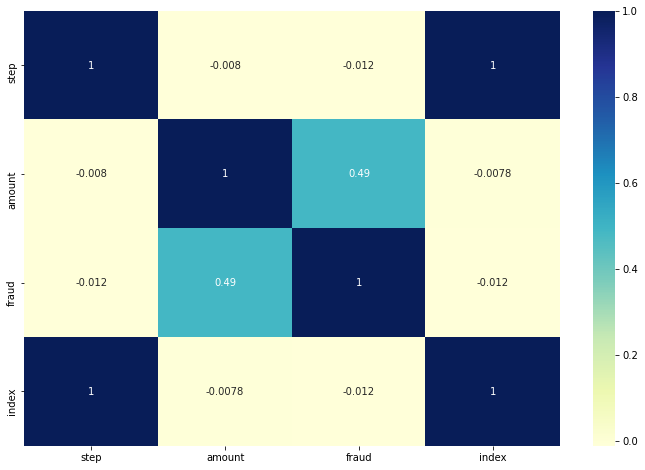

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(cordata, annot=True, cmap="YlGnBu")

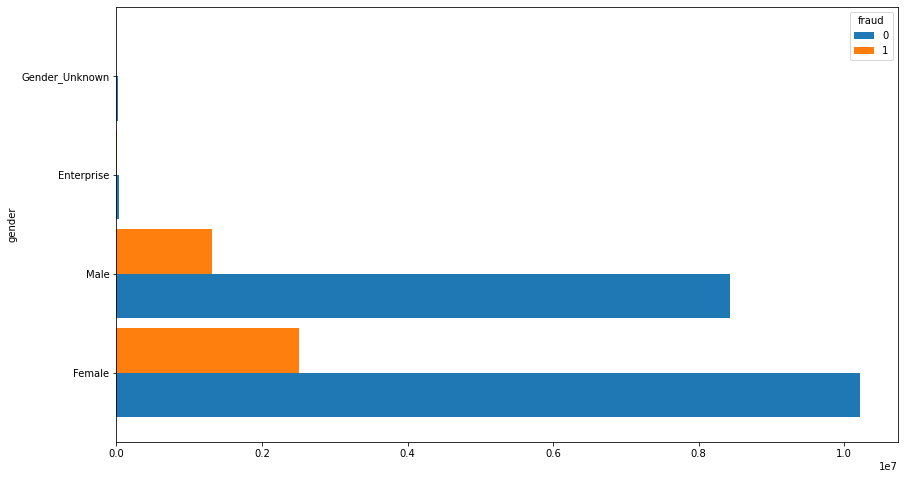

In [ ]:
graph=fraud_gender.plot(kind='barh', width=0.9)
fig = graph.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(14, 8)

In [ ]:
fraud_amount = pd.pivot_table(data=data,index="age",columns="fraud",values ="amount",aggfunc="count", margins=True)
fraud_amount=fraud_amount.sort_values(0, ascending=False)
fraud_amount

fraud,0,1,All
age,,,
All,587443,7200,594643
26-35 year,184966,2344,187310
36-45 year,145376,1755,147131
46-55 year,107615,1410,109025
56-65 year,61956,686,62642
19-25 year,57442,689,58131
>65 year,26513,261,26774
<=18 year,2404,48,2452
unknown,1171,7,1178


Text(0.5, 0.98, 'Daily Trend of Amount per Step')

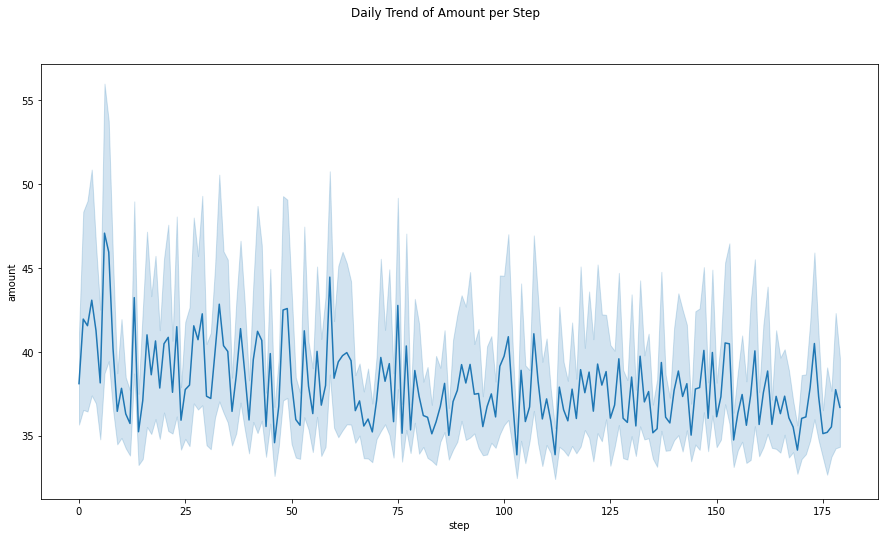

In [ ]:

fig = plt.figure(figsize =(15, 8))
sns.lineplot(data=data,x=data["step"],y= data["amount"])
fig.suptitle('Daily Trend of Amount per Step')

In [ ]:
#Daily Trend By Category
daily_trend_by_category = pd.pivot_table(data=data[data['fraud']==1],index="step",columns="category",values ="amount",aggfunc='sum')
daily_trend_by_category

category,domestic,restauration,wellnessandbeauty
step,,,
0,4493.06,769.55,7342.32
1,8824.10,1057.89,16187.15
2,4993.49,1468.03,17692.33
3,3663.07,1574.67,21514.37
4,6419.67,617.60,12907.09
...,...,...,...
175,4207.98,1172.05,6449.29
176,2055.61,996.14,12015.94
177,1451.78,2044.30,10338.41


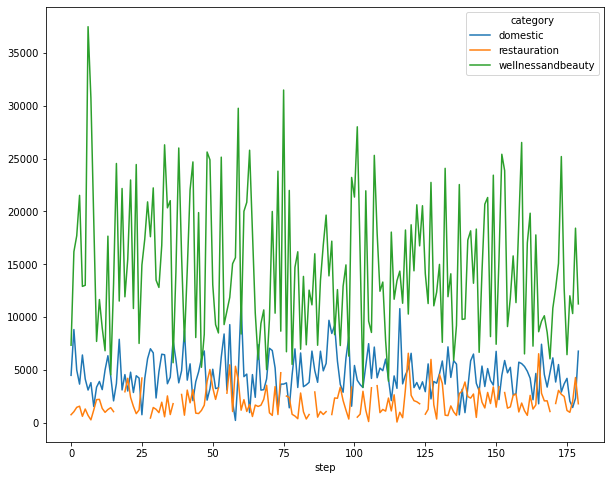

In [ ]:
daily_trend_by_category.plot(figsize=(10,8))

In [ ]:
#sns.lineplot(x=daily_trend_by_category.index,y=['domestic','restauration','transportation','wellnessandbeauty'])

In [ ]:
#Daily Trend By Category
daily_trend_by_gender = pd.pivot_table(data=data[data['fraud']==1],index="step",columns="gender",values ="amount",aggfunc='sum')
#fraud_step=fraud_step.sort_values(0, ascending=False)
daily_trend_by_gender

gender,Enterprise,Female,Male
step,,,
0,NaN,10091.04,2513.89
1,NaN,20671.16,5397.98
2,NaN,21149.47,3004.38
3,NaN,14636.64,12115.47
4,NaN,12306.91,7637.45
...,...,...,...
175,NaN,8100.90,3728.42
176,NaN,6132.20,8935.49
177,NaN,8794.27,5040.22


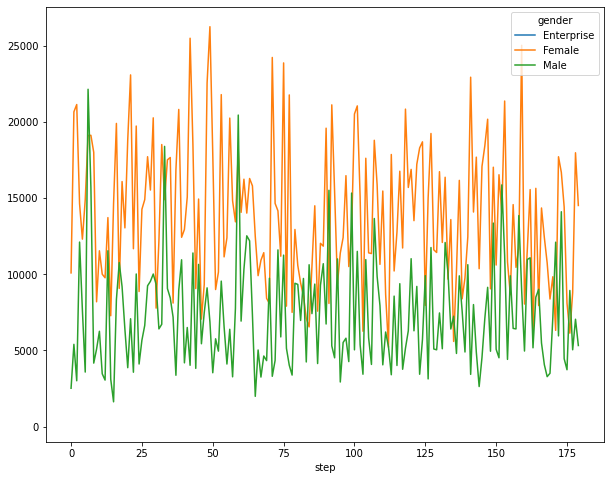

In [ ]:
daily_trend_by_gender.plot(figsize=(10,8))

In [ ]:
#Daily Trend By Category
daily_trend_by_gender2 = pd.pivot_table(data=data[data['fraud']==1],index=["step","fraud"],columns="gender",values ="amount",aggfunc='sum', fill_value=0)
#fraud_step=fraud_step.sort_values(0, ascending=False)
daily_trend_by_gender2

,gender,Enterprise,Female,Male
step,fraud,,,
0,1,0.0,10091.04,2513.89
1,1,0.0,20671.16,5397.98
2,1,0.0,21149.47,3004.38
3,1,0.0,14636.64,12115.47
4,1,0.0,12306.91,7637.45
...,...,...,...,...
175,1,0.0,8100.90,3728.42
176,1,0.0,6132.20,8935.49
177,1,0.0,8794.27,5040.22


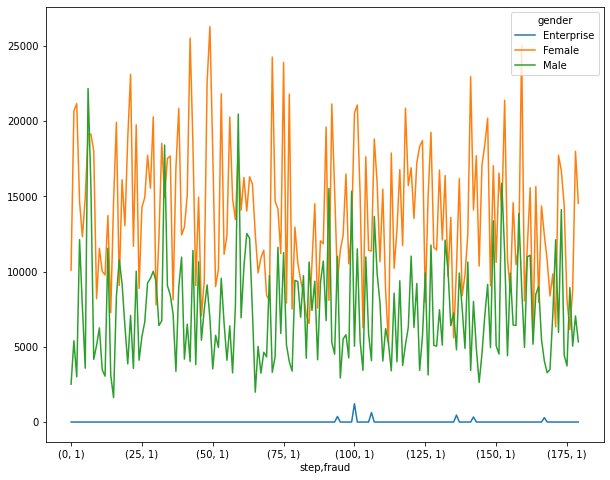

In [ ]:
daily_trend_by_gender2.plot(figsize=(10,8))

### 3-. Calculation of daily trends of transactions for different categories of variables

In [ ]:
contigency=pd.crosstab(data['gender'],data['fraud'], normalize=True)
contigency

fraud,0,1
gender,,
Enterprise,0.001969,0.000012
Female,0.537813,0.008001
Gender_Unknown,0.000866,0.000000
Male,0.447243,0.004095


In [ ]:
contigency.T.values

array([[1.96924878e-03, 5.37813444e-01, 8.66065858e-04, 4.47243136e-01],
       [1.17717689e-05, 8.00143952e-03, 0.00000000e+00, 4.09489391e-03]])

In [ ]:
# Apply Test
stat, p, dof, expected = chi2_contingency(fraud_amount.T.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

p-values: 0.00018740041886094232
Hypothesis Rejected


In [ ]:
contigency=pd.crosstab(data['category'],data['fraud'], normalize=True)
contigency

fraud,0,1
category,,
domestic,0.071261,0.003360
restauration,0.015165,0.001507
transportation,0.849449,0.000000
wellnessandbeauty,0.052016,0.007241


In [ ]:
contigency.T.values

array([[0.07126124, 0.0151654 , 0.84944917, 0.05201608],
       [0.00336   , 0.00150679, 0.        , 0.00724132]])

In [ ]:
# Apply Test
stat, p, dof, expected = chi2_contingency(fraud_amount.T.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

p-values: 0.00018740041886094232
Hypothesis Rejected


In [ ]:
contigency2=pd.crosstab(data['age'],data['fraud'], normalize=True)
contigency2

fraud,0,1
age,,
19-25 year,0.096599,0.001159
26-35 year,0.311054,0.003942
36-45 year,0.244476,0.002951
46-55 year,0.180974,0.002371
56-65 year,0.104190,0.001154
<=18 year,0.004043,0.000081
>65 year,0.044586,0.000439
unknown,0.001969,0.000012


In [ ]:
contigency2.T.values

array([[9.65991360e-02, 3.11053859e-01, 2.44476097e-01, 1.80974131e-01,
        1.04190245e-01, 4.04276179e-03, 4.45864157e-02, 1.96924878e-03],
       [1.15867840e-03, 3.94186091e-03, 2.95135064e-03, 2.37117060e-03,
        1.15363336e-03, 8.07207013e-05, 4.38918813e-04, 1.17717689e-05]])

In [ ]:
# Apply Test
stat, p, dof, expected = chi2_contingency(contigency2.T.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

p-values: 1.0
Hypothesis Accepted


In [ ]:
# pvalue=0.05
# H0 : gender and fraud are independant or no association between two variable
# H1 : They are dependent or there is an association between the two variables
c,p,dof, expected =chi2_contingency(contigency2)
p

1.0

In [ ]:
# p>0.05
# on accpte Ho: thereis no distribution between these two variables

In [ ]:
data['fraud'].value_counts(normalize=True).to_frame()

,fraud
0,0.987892
1,0.012108


In [ ]:
total =data.groupby(by=["fraud"]).index.mean().to_frame()
total.columns = ["% fraud"]

In [ ]:
fraud_agee = pd.pivot_table(data=data,index="age",columns="fraud",values ="index",aggfunc="count")/data.shape[0]
fraud_agee = fraud_agee.sort_values(0, ascending=False)
fraud_agee

fraud,0,1
age,,
26-35 year,0.311054,0.003942
36-45 year,0.244476,0.002951
46-55 year,0.180974,0.002371
56-65 year,0.104190,0.001154
19-25 year,0.096599,0.001159
>65 year,0.044586,0.000439
<=18 year,0.004043,0.000081
unknown,0.001969,0.000012


In [ ]:
fraud_cat = pd.pivot_table(data=data,index="category",columns="fraud",values ="index",aggfunc="count")/data.shape[0]
fraud_cat = fraud_cat.sort_values(0, ascending=False)
fraud_cat

fraud,0,1
category,,
transportation,0.849449,NaN
domestic,0.071261,0.003360
wellnessandbeauty,0.052016,0.007241
restauration,0.015165,0.001507


In [ ]:
fraud_g = pd.pivot_table(data=data,index="gender",columns="fraud",values ="index",aggfunc="count",margins=1)/data.shape[0]
fraud_g = fraud_g.sort_values(0, ascending=False)
fraud_g

fraud,0,1,All
gender,,,
All,0.987892,0.012108,1.000000
Female,0.537813,0.008001,0.545815
Male,0.447243,0.004095,0.451338
Enterprise,0.001969,0.000012,0.001981
Gender_Unknown,0.000866,NaN,0.000866


In [ ]:
rel=[fraud_g,fraud_cat,fraud_agee]

In [ ]:
resul=pd.concat(rel)

In [ ]:
resul

fraud,0,1,All
All,0.987892,0.012108,1.000000
Female,0.537813,0.008001,0.545815
Male,0.447243,0.004095,0.451338
Enterprise,0.001969,0.000012,0.001981
Gender_Unknown,0.000866,NaN,0.000866
transportation,0.849449,NaN,NaN
domestic,0.071261,0.003360,NaN
wellnessandbeauty,0.052016,0.007241,NaN
restauration,0.015165,0.001507,NaN
26-35 year,0.311054,0.003942,NaN
